# GSEA Analysis

In [271]:
library('clusterProfiler')
library('org.Hs.eg.db')


In [276]:
df = read.csv('upreg_genes.csv', sep=',')
converter = bitr(upreg_df$gene, fromType='SYMBOL', toType='ENTREZID', OrgDb="org.Hs.eg.db", drop=FALSE)
df = merge(df, converter, by.x='gene', by.y='SYMBOL', all.x=TRUE)
upreg_df = df[df$de_diff > 0 & df$de_fdr < 0.05,]

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(upreg_df$gene, fromType = "SYMBOL", toType = "ENTREZID", :
“3.59% of input gene IDs are fail to map...”


### All CT Over Representation Analysis - ALL GENES

In [377]:
dec_var_all_ct <- enrichKEGG(
    gene=unique(df[!is.na(upreg_df$ENTREZID) & (df$dv_fdr < 0.1) & (df$dv_diff < 0),]$ENTREZID), 
    qvalueCutoff=0.1, 
    pvalueCutoff=1,
    use_internal_data=FALSE)
inc_var_all_ct <- enrichKEGG(
    gene=unique(df[!is.na(upreg_df$ENTREZID) & (df$dv_fdr < 0.1) & (df$dv_diff > 0),]$ENTREZID),
    qvalueCutoff=0.1, 
    pvalueCutoff=1,
    use_internal_data=FALSE)

Warning message in !is.na(upreg_df$ENTREZID) & (df$dv_fdr < 0.1):
“longer object length is not a multiple of shorter object length”
Warning message in !is.na(upreg_df$ENTREZID) & (df$dv_fdr < 0.1):
“longer object length is not a multiple of shorter object length”


In [378]:
length(unique(df[!is.na(df$ENTREZID) & (df$dv_fdr < 0.1) & (df$dv_diff < 0),]$ENTREZID))

[1] 633

In [379]:
length(unique(df[!is.na(df$ENTREZID) & (df$dv_fdr < 0.1) & (df$dv_diff > 0),]$ENTREZID))

[1] 667

In [380]:
head(dec_var_all_ct, 100)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05164,hsa05164,Influenza A,25/326,170/8026,1.815262e-08,4.635355e-06,4.223889e-06,578/637/10241/6347/6352/3627/54205/5610/8772/355/3383/64135/3661/3665/3838/4599/4790/4793/4938/4939/4940/5371/8480/91543/8743,25
hsa05169,hsa05169,Epstein-Barr virus infection,27/326,201/8026,3.459220e-08,4.635355e-06,4.223889e-06,578/637/919/916/1026/1027/3627/54205/5610/8772/355/4616/3383/3661/3665/9636/4790/4793/4938/4939/4940/5701/5704/5706/5718/5971/864,27
hsa04621,hsa04621,NOD-like receptor signaling pathway,23/326,181/8026,1.011389e-06,6.609409e-05,6.022714e-05,9447/9474/114769/837/6347/6352/8772/23710/115362/388646/79792/3661/3665/4790/4793/4938/4939/4940/5586/10616/8767/7295/7531,23
hsa05160,hsa05160,Hepatitis C,21/326,155/8026,1.049696e-06,6.609409e-05,6.022714e-05,578/637/1026/3627/54205/27102/5610/8772/355/3434/3661/3665/4599/4790/4893/4938/4939/4940/91543/7531/7533,21
hsa03050,hsa03050,Proteasome,11/326,45/8026,1.233099e-06,6.609409e-05,6.022714e-05,5684/5687/5689/5692/5696/5698/5701/5704/5706/5718/5721,11
hsa05162,hsa05162,Measles,19/326,138/8026,2.708931e-06,1.209989e-04,1.102582e-04,578/637/916/4179/1027/54205/27102/5610/8772/355/64135/3661/3665/4599/4790/4793/4938/4939/4940,19
hsa05170,hsa05170,Human immunodeficiency virus 1 infection,20/326,212/8026,3.721344e-04,1.424743e-02,1.298273e-02,200315/578/637/684/919/916/54205/1642/8772/355/59345/54331/2787/3661/4790/4893/5058/25939/7133/85363,20
hsa04622,hsa04622,RIG-I-like receptor signaling pathway,10/326,70/8026,4.822032e-04,1.594686e-02,1.453131e-02,9474/3627/8772/64135/3661/3665/9636/4790/4793/5300,10
hsa05167,hsa05167,Kaposi sarcoma-associated herpesvirus infection,18/326,186/8026,5.355288e-04,1.594686e-02,1.453131e-02,578/637/1026/54205/5610/8772/355/23710/59345/54331/2787/3055/3383/3661/3665/4790/4893/7538,18


In [382]:
head(inc_var_all_ct, 100)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa03010,hsa03010,Ribosome,50/336,158/8026,2.919263e-31,8.086358e-29,6.914043e-29,65008/29088/63875/29074/51069/79590/51264/51073/6134/4736/6135/23521/6141/6142/6143/6144/9349/6154/6159/6160/6161/6164/11224/6165/6173/6124/6171/6125/6128/6129/6132/6133/6175/6207/6209/6210/6222/6187/6224/6228/6232/6233/51065/6188/6189/6191/6193/6194/6201/3921,50
hsa05164,hsa05164,Influenza A,24/336,170/8026,1.394730e-07,1.931701e-05,1.651654e-05,60/71/637/10241/836/841/6347/3627/5611/356/3113/3115/3119/3123/3454/3455/51135/3838/4615/5970/293/9021/7132/8743,24
hsa04210,hsa04210,Apoptosis,19/336,136/8026,3.388993e-06,3.129170e-04,2.675521e-04,60/71/572/597/637/836/841/1075/1509/1512/356/2353/3002/4000/5551/5970/7132/8743/10376,19
hsa05152,hsa05152,Tuberculosis,20/336,180/8026,5.964439e-05,3.872307e-03,3.310922e-03,572/637/801/836/841/929/11151/1509/2207/2212/2214/3113/3115/3119/3123/51135/4046/4615/5970/7132,20
hsa05140,hsa05140,Leishmaniasis,12/336,77/8026,7.515861e-05,3.872307e-03,3.310922e-03,1535/2212/2214/2353/3113/3115/3119/3123/51135/65108/4615/5970,12
hsa05132,hsa05132,Salmonella infection,22/336,214/8026,8.387668e-05,3.872307e-03,3.310922e-03,60/71/10095/10093/81873/836/841/929/8655/2353/51135/4615/4627/10627/5216/5898/5970/6188/6281/7132/8743/7295,22
hsa05130,hsa05130,Pathogenic Escherichia coli infection,21/336,202/8026,1.035292e-04,4.096799e-03,3.502868e-03,60/71/10095/10093/81873/836/841/356/2212/2353/51135/4615/4627/64005/5970/6188/9368/7132/8743/10376/7456,21
hsa05416,hsa05416,Viral myocarditis,10/336,60/8026,1.683766e-04,5.830041e-03,4.984835e-03,60/71/637/836/841/3113/3115/3119/3123/5551,10
hsa05145,hsa05145,Toxoplasmosis,14/336,112/8026,2.249286e-04,6.922804e-03,5.919175e-03,572/836/841/2771/3113/3115/3119/3123/51135/4615/10105/5970/6774/7132,14


### All CT Over Representation Analysis

In [410]:
dec_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff < 0),]$ENTREZID), 
    qvalueCutoff=0.1, 
    pvalueCutoff=1,
    use_internal_data=FALSE)
inc_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff > 0),]$ENTREZID),
    qvalueCutoff=0.1, 
    pvalueCutoff=1,
    use_internal_data=FALSE)

In [411]:
length(unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff < 0),]$ENTREZID))

[1] 178

In [412]:
length(unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff > 0),]$ENTREZID))

[1] 120

In [416]:
head(dec_var_all_ct, 100)
write.csv(dec_var_all_ct, 'dec_var_all_ct_pathway.csv')

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05164,hsa05164,Influenza A,16/106,170/8026,5.711667e-10,9.367134e-08,8.417194e-08,578/834/6347/3627/54205/5610/355/64135/3665/4599/4938/4939/4940/5371/91543/8743,16
hsa04621,hsa04621,NOD-like receptor signaling pathway,14/106,181/8026,9.201502e-08,7.545231e-06,6.780054e-06,9447/114769/834/837/6347/115361/115362/388646/79792/3665/4938/4939/4940/10616,14
hsa05160,hsa05160,Hepatitis C,12/106,155/8026,8.094641e-07,4.425070e-05,3.976315e-05,578/3627/54205/5610/355/3434/3665/4599/4938/4939/4940/91543,12
hsa05169,hsa05169,Epstein-Barr virus infection,12/106,201/8026,1.224296e-05,4.179950e-04,3.756053e-04,578/3627/54205/5610/355/4616/3665/9636/4938/4939/4940/864,12
hsa05162,hsa05162,Measles,10/106,138/8026,1.274375e-05,4.179950e-04,3.756053e-04,578/54205/5610/355/64135/3665/4599/4938/4939/4940,10
hsa04623,hsa04623,Cytosolic DNA-sensing pathway,5/106,63/8026,1.398920e-03,3.823715e-02,3.435944e-02,9447/834/3627/3665/11277,5
hsa05170,hsa05170,Human immunodeficiency virus 1 infection,9/106,212/8026,1.889329e-03,4.261477e-02,3.829312e-02,200315/578/684/54205/355/59345/2787/25939/85363,9
hsa04210,hsa04210,Apoptosis,7/106,136/8026,2.078769e-03,4.261477e-02,3.829312e-02,578/54205/355/4616/4170/5366/8743,7
hsa03050,hsa03050,Proteasome,4/106,45/8026,2.825254e-03,5.110982e-02,4.592667e-02,5684/5696/5698/5721,4


In [417]:
head(inc_var_all_ct, 20)
write.csv(inc_var_all_ct, 'inc_var_all_ct_pathway.csv')

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05164,hsa05164,Influenza A,11/73,170/8026,3.179707e-07,6.041443e-05,4.384648e-05,10241/836/6347/3627/356/3113/3123/4615/5970/9021/8743,11
hsa05330,hsa05330,Allograft rejection,5/73,38/8026,2.153347e-05,1.260421e-03,9.147656e-04,356/3002/3113/3123/5551,5
hsa04210,hsa04210,Apoptosis,8/73,136/8026,2.942887e-05,1.260421e-03,9.147656e-04,836/1075/1509/356/3002/5551/5970/8743,8
hsa05332,hsa05332,Graft-versus-host disease,5/73,41/8026,3.147517e-05,1.260421e-03,9.147656e-04,356/3002/3113/3123/5551,5
hsa05152,hsa05152,Tuberculosis,9/73,180/8026,3.316898e-05,1.260421e-03,9.147656e-04,801/836/1509/2207/2212/3113/3123/4615/5970,9
hsa04940,hsa04940,Type I diabetes mellitus,5/73,43/8026,3.986261e-05,1.262316e-03,9.161406e-04,356/3002/3113/3123/5551,5
hsa04668,hsa04668,TNF signaling pathway,7/73,112/8026,6.512269e-05,1.767616e-03,1.282868e-03,836/6347/3627/3659/1326/5970/9021,7
hsa05320,hsa05320,Autoimmune thyroid disease,5/73,53/8026,1.107392e-04,2.630057e-03,1.908795e-03,356/3002/3113/3123/5551,5
hsa04650,hsa04650,Natural killer cell mediated cytotoxicity,7/73,131/8026,1.749143e-04,3.692636e-03,2.679974e-03,836/356/2207/3002/5551/8743/7305,7


### CT specific ORA CD8 T cells

In [430]:
ct = 'CD8 T cells'

dec_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff < 0) & (upreg_df$ct == ct),]$ENTREZID), 
    qvalueCutoff=0.1, 
    pvalueCutoff=0.05,
    use_internal_data=FALSE)
inc_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff > 0) & (upreg_df$ct == ct),]$ENTREZID),
    qvalueCutoff=0.1, 
    pvalueCutoff=0.05,
    use_internal_data=FALSE)

In [431]:
tail(gene_list)

81847     84196      8562     65109      7295     64231 
-3.311425 -3.327958 -3.388133 -3.668224 -3.900273 -3.955485

In [432]:
head(dec_var_all_ct, 20)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05160,hsa05160,Hepatitis C,3/11,155/8026,0.001040215,0.03339043,0.02486065,578/3434/91543,3
hsa04621,hsa04621,NOD-like receptor signaling pathway,3/11,181/8026,0.001628801,0.03339043,0.02486065,9447/837/10616,3
hsa04623,hsa04623,Cytosolic DNA-sensing pathway,2/11,63/8026,0.003186649,0.04355087,0.03242555,9447/11277,2
hsa05212,hsa05212,Pancreatic cancer,2/11,76/8026,0.004605258,0.04720390,0.03514539,578/5899,2
hsa05210,hsa05210,Colorectal cancer,2/11,86/8026,0.005862033,0.04806867,0.03578925,578/5899,2


In [433]:
head(inc_var_all_ct, 100)
write.csv(inc_var_all_ct, 'inc_var_cd8_pathway.csv')

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa04931,hsa04931,Insulin resistance,3/12,108/8026,0.0004772365,0.01967493,0.01412077,5770/9021/6774,3
hsa05330,hsa05330,Allograft rejection,2/12,38/8026,0.0013982741,0.01967493,0.01412077,3113/5551,2
hsa04216,hsa04216,Ferroptosis,2/12,40/8026,0.0015488520,0.01967493,0.01412077,5621/6303,2
hsa05332,hsa05332,Graft-versus-host disease,2/12,41/8026,0.0016269280,0.01967493,0.01412077,3113/5551,2
hsa05164,hsa05164,Influenza A,3/12,170/8026,0.0017843159,0.01967493,0.01412077,10241/3113/9021,3
hsa04940,hsa04940,Type I diabetes mellitus,2/12,43/8026,0.0017886304,0.01967493,0.01412077,3113/5551,2
hsa05320,hsa05320,Autoimmune thyroid disease,2/12,53/8026,0.0027069122,0.02552232,0.01831745,3113/5551,2
hsa05416,hsa05416,Viral myocarditis,2/12,60/8026,0.0034567897,0.02806474,0.02014216,3113/5551,2
hsa05321,hsa05321,Inflammatory bowel disease (IBD),2/12,65/8026,0.0040453809,0.02806474,0.02014216,3113/6774,2


### CT specific ORA NK cells

In [426]:
ct = 'NK cells'

dec_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff < 0) & (upreg_df$ct == ct),]$ENTREZID), 
    qvalueCutoff=0.1, 
    pvalueCutoff=0.05,
    use_internal_data=FALSE)
inc_var_all_ct <- enrichKEGG(
    gene=unique(upreg_df[!is.na(upreg_df$ENTREZID) & (upreg_df$dv_fdr < 0.1) & (upreg_df$dv_diff > 0) & (upreg_df$ct == ct),]$ENTREZID),
    qvalueCutoff=0.1, 
    pvalueCutoff=0.05,
    use_internal_data=FALSE)

In [427]:
tail(gene_list)

81847     84196      8562     65109      7295     64231 
-3.311425 -3.327958 -3.388133 -3.668224 -3.900273 -3.955485

In [428]:
head(dec_var_all_ct, 20)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05162,hsa05162,Measles,3/12,138/8026,0.0009766454,0.02713162,0.01276067,3665/4599/4940,3
hsa05160,hsa05160,Hepatitis C,3/12,155/8026,0.0013673840,0.02713162,0.01276067,3665/4599/4940,3
hsa05164,hsa05164,Influenza A,3/12,170/8026,0.0017843159,0.02713162,0.01276067,3665/4599/4940,3
hsa05167,hsa05167,Kaposi sarcoma-associated herpesvirus infection,3/12,186/8026,0.0023090743,0.02713162,0.01276067,59345/2787/3665,3
hsa05170,hsa05170,Human immunodeficiency virus 1 infection,3/12,212/8026,0.0033511313,0.03150063,0.01481553,59345/2787/85363,3


In [429]:
head(inc_var_all_ct, 100)
write.csv(inc_var_all_ct, 'inc_var_nk_pathway.csv')

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05164,hsa05164,Influenza A,7/13,170/8026,2.607445e-09,2.294552e-07,1.289999e-07,836/6347/356/3123/4615/9021/8743,7
hsa05330,hsa05330,Allograft rejection,3/13,38/8026,2.710776e-05,7.346755e-04,4.130353e-04,356/3002/3123,3
hsa05332,hsa05332,Graft-versus-host disease,3/13,41/8026,3.415814e-05,7.346755e-04,4.130353e-04,356/3002/3123,3
hsa04940,hsa04940,Type I diabetes mellitus,3/13,43/8026,3.947061e-05,7.346755e-04,4.130353e-04,356/3002/3123,3
hsa04650,hsa04650,Natural killer cell mediated cytotoxicity,4/13,131/8026,4.324300e-05,7.346755e-04,4.130353e-04,836/356/3002/8743,4
hsa04210,hsa04210,Apoptosis,4/13,136/8026,5.009151e-05,7.346755e-04,4.130353e-04,836/356/3002/8743,4
hsa05168,hsa05168,Herpes simplex virus 1 infection,6/13,491/8026,6.028622e-05,7.578840e-04,4.260831e-04,836/6347/356/3123/4615/9021,6
hsa05320,hsa05320,Autoimmune thyroid disease,3/13,53/8026,7.422552e-05,8.164807e-04,4.590262e-04,356/3002/3123,3
hsa05130,hsa05130,Pathogenic Escherichia coli infection,4/13,202/8026,2.329958e-04,2.278182e-03,1.280796e-03,836/356/4615/8743,4


### GSEA

In [360]:
ct = 'CD8 T cells'


In [361]:
gene_list = df[!is.na(df$ENTREZID) & (df$ct == ct),]$dv_diff
names(gene_list) = df[!is.na(df$ENTREZID) & (df$ct == ct),]$ENTREZID
gene_list = sort(gene_list, decreasing=TRUE)

In [362]:
length(gene_list)

[1] 3424

In [301]:
gsea <- gseKEGG(
    gene_list,
    organism = "hsa",
    keyType = "kegg",
    exponent = 1,
    nPerm = 1000,
    minGSSize = 10,
    maxGSSize = 500,
    pvalueCutoff = 0.1,
    pAdjustMethod = "BH",
    verbose = TRUE,
    use_internal_data = FALSE,
    seed = FALSE,
    by = "fgsea"
    )

preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



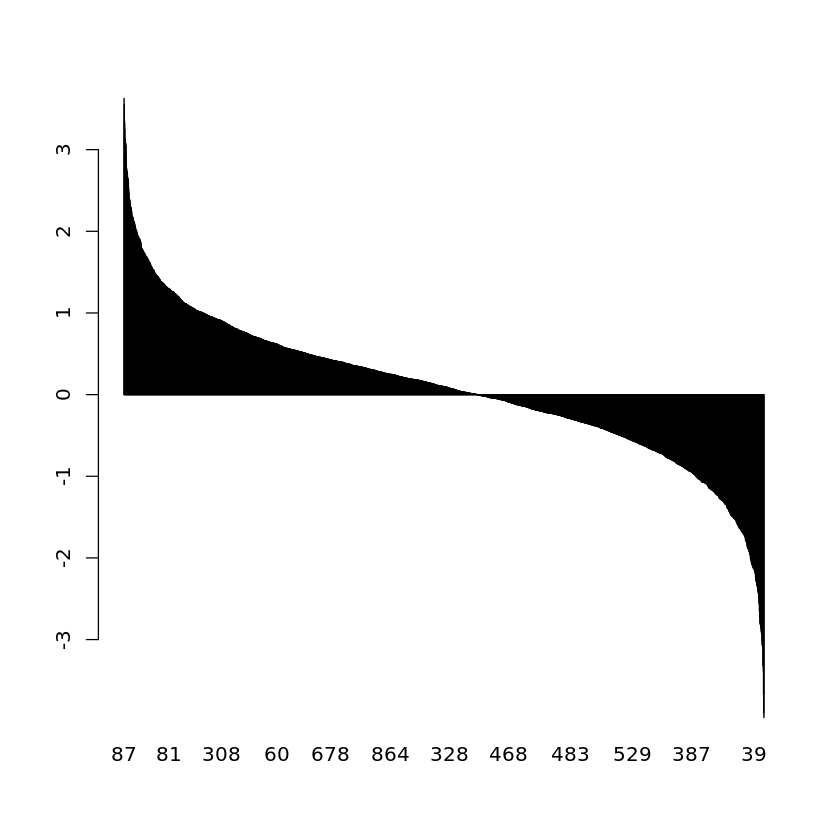

In [303]:
barplot(gene_list)

In [302]:
head(gsea, 30)

ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [22]:
head(df)$gene

[1] HES4     ISG15    NADK     RER1     TNFRSF14 ENO1    
1347 Levels: AAED1 ABHD12 ABHD3 ABI1 ABLIM1 ABRACL ACAA1 ACAT1 ACOT9 ... ZRSR2